centers.shape (6, 1)
heights.shape (4, 1)
weights.shape (4, 1)
x.shape (4, 6)
Original inputs [[1.32]
 [1.45]
 [1.66]
 [1.88]]
RBF repr [[3.59155441e-01 8.65887748e-01 9.38005000e-01 4.56576050e-01
  9.98586094e-02 9.81346359e-03]
 [1.31993843e-01 5.35261429e-01 9.75309912e-01 7.98516219e-01
  2.93757700e-01 4.85578213e-02]
 [1.28296036e-02 1.20512717e-01 5.08647519e-01 9.64640293e-01
  8.22012235e-01 3.14742637e-01]
 [4.33334765e-04 9.81346359e-03 9.98586094e-02 4.56576050e-01
  9.38005000e-01 8.65887748e-01]]
Score on training data =  0.9936685281973114
all_x.shape (1000, 1)
expanded_x.shape (1000, 6)
all_y.shape (1000, 1)


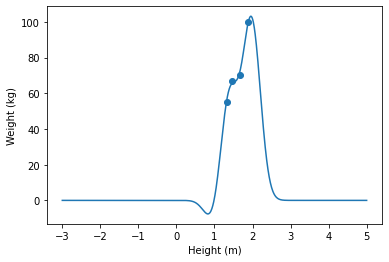

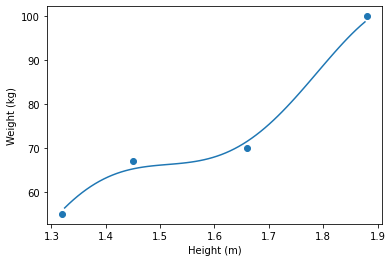

In [8]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

# Try to predict weight as a function of height.
# Physics would suggest that weight is proportional to volume,
# and volume is proportional to height^3.  However we will
# use a linear parameter model with radial basis functions
# to model this nonlinear relationship.

heights = np.asarray([1.32, 1.45, 1.66, 1.88]).reshape(-1, 1)
weights = np.asarray([55, 67, 70, 100]).reshape(-1, 1)
centers = np.asarray([1.0, 1.2, 1.4, 1.6, 1.8, 2.0]).reshape(-1, 1)
print("centers.shape", centers.shape)
print("heights.shape", heights.shape)
print("weights.shape", weights.shape)

# I recommend playing around with these parameters and seeing how well you fit
# the data.  Changing one of the parameters will change the optimal value of
# the other:
sigma = 0.1
alpha = 0.005

# New representation:
x = rbf_kernel(heights, centers, gamma=1.0 / sigma)
print("x.shape", x.shape)
print("Original inputs", heights)
print("RBF repr", x)

# Now go and fit a linear model between x and height
regr = Ridge(alpha=alpha, fit_intercept=False)
regr.fit(x, weights)
print("Score on training data = ", regr.score(x, weights))
all_x = np.linspace(-3.0, 5.0, 1000).reshape(-1, 1)

# New representation:
expanded_x = rbf_kernel(all_x, centers, gamma=1.0 / sigma)
all_y = regr.predict(expanded_x)
print("all_x.shape", all_x.shape)
print("expanded_x.shape", expanded_x.shape)
print("all_y.shape", all_y.shape)

# Show that the predictions tend to zero far away from inputs
plt.figure()
plt.plot(all_x, all_y)
plt.scatter(heights, weights)
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")


# Zoom in and see how well predictions fit the data
zoom_ind = (all_x > heights.min()) & (all_x < heights.max())
plt.figure()
plt.plot(all_x[zoom_ind], all_y[zoom_ind])
plt.scatter(heights, weights)
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.show()

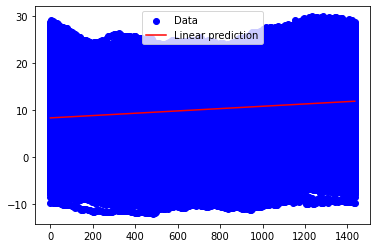

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

years = range(2011, 2017)
files = ['CRNS0101-05-%d-CA_Yosemite_Village_12_W.txt' % y for y in years]
usecols = [1, 2, 8]

data = [np.loadtxt(f, usecols=usecols) for f in files]
data = np.vstack(data)

# Map from HHmm to an integer
data[:, 1] = np.floor_divide(data[:, 1], 100) * 60 + np.mod(data[:, 1], 100)
valid = data[:, 2] > -1000

x_train = data[valid, 1].reshape(-1, 1)
y_train = data[valid, 2]
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

x_predict = [[0], [1435]]
y_predict = regr.predict(x_predict)

plt.scatter(data[valid, 1], data[valid, 2], label='Data', color='b')
plt.plot(x_predict, y_predict, label='Linear prediction', color='r')
plt.legend(loc='best')
plt.show()

In [10]:
def get_daily_means(x):
    x_c = x.reshape(1,-1)[0]
    means = []
    # each day has 24 hours, and 12 measurements each hour
    day = 24*12
    for i in range(0, len(x_c)-day, day):
        means.append(np.mean(x_c[i:i+day]))
    
    return np.array(means).reshape(-1,1)

x_means = get_daily_means(x_train)
y_means = get_daily_means(y_train)

month_centers = np.array([np.mean(x_means[i:i+30]) for i in range(0, len(x_train) - 30, 30)]).reshape(-1,1)

x = rbf_kernel(x_means, month_centers, gamma=1.0/sigma)

regr = linear_model.LinearRegression() 
regr.fit(x, y_means)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').